In [1]:
%matplotlib widget

In [2]:
import matplotlib.pyplot as plt
import stir
from stirextra import *
import os

In [3]:
prompts = stir.ProjData.read_from_file('my_prompts.hs')
atten_image = stir.FloatVoxelsOnCartesianGrid.read_from_file('CTAC.hv')
norm = stir.BinNormalisationFromProjData(stir.ProjData.read_from_file('my_norm.hs'))
acf_factors = stir.ProjData.read_from_file('my_acfs.hs')
randoms = stir.ProjData.read_from_file('my_randoms.hs')


INFO: Interfile warning: I did not recognise the scanner from 'originating_system' (Downsampled LAFOV). Hopefully there is enough information present. I will check this now.

INFO: Interfile parsing ended up with the following scanner:
Scanner parameters:=
  Scanner type := Downsampled LAFOV
  Number of rings                          := 40
  Number of detectors per ring             := 114
  Inner ring diameter (cm)                 := 82
  Average depth of interaction (cm)        := 0.7
  Distance between rings (cm)              := 2.63291
  Default bin size (cm)                    := 1.28
  View offset (degrees)                    := 0
  Maximum number of non-arc-corrected bins := 65
  Default number of arc-corrected bins     := 65
  Energy resolution         := 0.098
  Reference energy (in keV) := 511
  Maximum number of (unmashed) TOF time bins := 214
  Size of unmashed TOF time bins (ps)        := 17.9039
  TOF timing resolution (ps)                 := 214
  Number of blocks per bu

0
  Number of crystals per block in transaxial direction        := 21
  Number of detector layers                                   := 1
  Number of crystals per singles unit in axial direction      := 10
  Number of crystals per singles unit in transaxial direction := 21
  Scanner geometry (BlocksOnCylindrical/Cylindrical/Generic)  := Cylindrical
End scanner parameters:=



INFO: Interfile warning: I did not recognise the scanner from 'originating_system' (Downsampled LAFOV). Hopefully there is enough information present. I will check this now.

INFO: Interfile parsing ended up with the following scanner:
Scanner parameters:=
  Scanner type := Downsampled LAFOV
  Number of rings                          := 40
  Number of detectors per ring             := 114
  Inner ring diameter (cm)                 := 82
  Average depth of interaction (cm)        := 0.7
  Distance between rings (cm)              := 2.63291
  Default bin size (cm)                    := 1.28
  View offset (degrees)   

In [4]:
scatter_estimator = stir.ScatterEstimation()

In [5]:
filter = stir.SeparableGaussianImageFilter3DFloat()
filter.set_fwhms(stir.make_FloatCoordinate(15,15,15))

recon = stir.OSMAPOSLReconstruction3DFloat()
recon.set_num_subsets(3)
recon.set_num_subiterations(7)
recon.set_disable_output(True)
recon.set_post_processor_sptr(filter)
objfunc = stir.PoissonLogLikelihoodWithLinearModelForMeanAndProjData3DFloat()
recon.set_objective_function(objfunc)

In [6]:
scatter_estimator.set_input_data(prompts)
scatter_estimator.set_attenuation_image_sptr(atten_image)
scatter_estimator.set_background_proj_data_sptr(randoms)
scatter_estimator.set_normalisation_sptr(norm)
scatter_estimator.set_reconstruction_method_sptr(recon)
scatter_estimator.set_attenuation_correction_proj_data_sptr(acf_factors)
scatter_estimator.set_output_scatter_estimate_prefix('p_scatter')
scatter_estimator.set_num_iterations(3)
scatter_estimator.set_up()


INFO: Interfile parsing ended up with the following scanner:
Scanner parameters:=
  Scanner type := Downsampled LAFOV
  Number of rings                          := 40
  Number of detectors per ring             := 114
  Inner ring diameter (cm)                 := 82
  Average depth of interaction (cm)        := 0.7
  Distance between rings (cm)              := 2.63291
  Default bin size (cm)                    := 1.28
  View offset (degrees)                    := 0
  Maximum number of non-arc-corrected bins := 65
  Default number of arc-corrected bins     := 65
  Energy resolution         := 0.098
  Reference energy (in keV) := 511
  Maximum number of (unmashed) TOF time bins := 214
  Size of unmashed TOF time bins (ps)        := 17.9039
  TOF timing resolution (ps)                 := 214
  Number of blocks per bucket in transaxial direction         := 1
  Number of blocks per bucket in axial direction              := 1
  Number of crystals per block in axial direction             := 1


This matrix will completely miss some voxels for some (or all) views. It is therefore to best to increase 'number of rays in tangential direction to trace for each bin'.


<stir::Succeeded::yes>

 scatter estimation parameters := 




INFO: ScatterEstimation: Setting up reconstruction method ...

INFO: ScatterEstimation: Setting up iterative reconstruction ...

INFO: ScatterEstimation: 3.Calculating the attenuation projection data...

INFO: ScatterEstimation: 4.Calculating the normalisation data...

INFO: ScatterEstimation: Done normalisation coefficients.

INFO: ScatterEstimation: 5.Calculating the background data and data_to_fit for the scaling...

INFO: Determined voxel size by dividing default_bin_size (12.8) by zoom

INFO: ScatterEstimation: Setting up Scatter Simulation method ...

INFO: ScatterEstimation: Over-riding attenuation image! (The file and settings set in the simulation par file are discarded)

INFO: ScatterEstimation: Over-riding the scanner template! (The file and settings set in the simulation par file are discarded)

INFO: Gaussian filter dim[1] ={3.6355e-09, 0.000157715, 0.0955559, 0.808573, 0.0955559, 0.000157715, 3.6355e-09}


INFO: Gaussian filter dim[2

In [7]:
scatter_estimator.process_data()

847 bins in mask for sinogram at segment 0, axial_pos 0
847 bins in mask for sinogram at segment 0, axial_pos 1
847 bins in mask for sinogram at segment 0, axial_pos 2
847 bins in mask for sinogram at segment 0, axial_pos 3
847 bins in mask for sinogram at segment 0, axial_pos 4
847 bins in mask for sinogram at segment 0, axial_pos 5
847 bins in mask for sinogram at segment 0, axial_pos 6
847 bins in mask for sinogram at segment 0, axial_pos 7
847 bins in mask for sinogram at segment 0, axial_pos 8
847 bins in mask for sinogram at segment 0, axial_pos 9
847 bins in mask for sinogram at segment 0, axial_pos 10
847 bins in mask for sinogram at segment 0, axial_pos 11
847 bins in mask for sinogram at segment 0, axial_pos 12
847 bins in mask for sinogram at segment 0, axial_pos 13
847 bins in mask for sinogram at segment 0, axial_pos 14
847 bins in mask for sinogram at segment 0, axial_pos 15
847 bins in mask for sinogram at segment 0, axial_pos 16
847 bins in mask for sinogram at segment 


Weighted data in denominator -0.00130142 is very small compared to total in sinogram -0.00130142.
Adjust weights?.
I will use scale factor 1

Weighted data in denominator -0.000637638 is very small compared to total in sinogram -0.000637636.
Adjust weights?.
I will use scale factor 1

Weighted data in denominator -1.91849e-06 is very small compared to total in sinogram -1.91848e-06.
Adjust weights?.
I will use scale factor 1

Weighted data in denominator -5.28034e-07 is very small compared to total in sinogram -5.28033e-07.
Adjust weights?.
I will use scale factor 1

Weighted data in denominator -2.20472e-09 is very small compared to total in sinogram -2.20471e-09.
Adjust weights?.
I will use scale factor 1

Weighted data in denominator -4.312e-10 is very small compared to total in sinogram -4.31199e-10.
Adjust weights?.
I will use scale factor 1

Weighted data in denominator -2.40629e-12 is very small compared to total in sinogram -2.40629e-12.
Adjust weights?.
I will use scale facto

<stir::Succeeded::yes>

r_estimate: scale factors after thresholding:
{{0.861479, 0.843139, 0.838659, 0.82706, 0.818797, 0.818675, 0.825519, 0.832276, 0.833077, 0.824201, 0.808166, 0.795516, 0.78958, 0.785072, 0.783515, 0.78695, 0.795726, 0.806524, 0.825375, 0.832032, 0.827644, 0.83749, 0.759473, 0.731777, 0.643704, 0.630933, 0.766669, 1, 1, 0.4, 1, 1, 0.4, 1, 1, 0.4, 1, 1, 0.4, 1}
}


INFO: upsample_and_fit_scatter_estimate: scale factors after filtering:
{{0.850682, 0.844585, 0.83847, 0.833333, 0.829161, 0.827723, 0.825658, 0.822959, 0.819633, 0.815477, 0.809698, 0.802733, 0.796143, 0.792075, 0.791841, 0.796106, 0.802171, 0.808252, 0.815963, 0.812038, 0.802902, 0.779642, 0.751865, 0.742527, 0.767149, 0.790365, 0.739012, 0.77733, 0.828229, 0.795238, 0.828571, 0.828571, 0.742857, 0.828571, 0.828571, 0.742857, 0.828571, 0.828571, 0.828571, 0.914286}
}


INFO: Building post filter kernel

INFO: Gaussian filter dim[1] ={3.63498e-09, 0.000157705, 0.0955546, 0.808575, 0.0955546, 0.000157705, 3.63498e-09}


INFO: G

Weighted data in denominator -4.33126e-10 is very small compared to total in sinogram -4.33125e-10.
Adjust weights?.
I will use scale factor 1

Weighted data in denominator -2.41704e-12 is very small compared to total in sinogram -2.41704e-12.
Adjust weights?.
I will use scale factor 1

Weighted data in denominator -3.4791e-13 is very small compared to total in sinogram -3.4791e-13.
Adjust weights?.
I will use scale factor 1

Weighted data in denominator -2.54858e-15 is very small compared to total in sinogram -2.54858e-15.
Adjust weights?.
I will use scale factor 1


OTAL SCATTER counts before upsampling and norm = 31687.9

INFO: ScatterEstimation: Scatter simulation done...

INFO: upsample_and_fit_scatter_estimate: Interpolating scatter estimate to size of emission data

INFO: upsample_and_fit_scatter_estimate: scale factors before thresholding:
{{0.953521, 0.928759, 0.941644, 0.94847, 0.952799, 0.959754, 0.971106, 0.980791, 0.982552, 0.971656, 0.95062, 0.932627, 0.92236, 0.91415, 0.909904, 0.910354, 0.912758, 0.910219, 0.911127, 0.90063, 0.893256, 0.887205, 0.79746, 0.785477, 0.718554, 0.758947, 1.10033, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1}
}


INFO: upsample_and_fit_scatter_estimate: scale factors after thresholding:
{{0.953521, 0.928759, 0.941644, 0.94847, 0.952799, 0.959754, 0.971106, 0.980791, 0.982552, 0.971656, 0.95062, 0.932627, 0.92236, 0.91415, 0.909904, 0.910354, 0.912758, 0.910219, 0.911127, 0.90063, 0.893256, 0.887205, 0.79746, 0.785477, 0.718554, 0.758947, 1.10033, 1, 1, 0.4, 1, 1, 0.4, 1, 1, 0.4, 1, 1, 0.4, 1}
}


INFO: upsample_a

In [8]:
estimated_scatter = scatter_estimator.get_output()
estimated_scatter.write_to_file('scatter_estimate_run0.hs')

<stir::Succeeded::yes>

In [9]:
# original scatter as generated by the simulation
org_scatter=stir.ProjData.read_from_file('my_scatter.hs')
org_scatter_arr=to_numpy(org_scatter)
# estimated scatter
estimated_scatter_arr = to_numpy(stir.ProjData.read_from_file('scatter_estimate_run0.hs')); #BEN
#estimated_scatter_arr = to_numpy(stir.ProjData.read_from_file('scatter_estimate_run0_ben.hs'));

imate 0 2.27541


INFO: Now processing subset #: 1

INFO: Number of (cancelled) singularities: 0
Number of (cancelled) negative numerators: 0

INFO: Computation times for distributable_computation, CPU 0.09s, wall-clock 0.088232s

INFO: Number of (cancelled) singularities in Sensitivity division: 0

INFO: Update image old min,max: 0, 1.03251, new min,max 0, 3.40282e+38

INFO: OSEM subiteration #5 completed
  min and max in current estimate 0 2.32883


INFO: Now processing subset #: 2

INFO: Number of (cancelled) singularities: 0
Number of (cancelled) negative numerators: 0

INFO: Computation times for distributable_computation, CPU 0.08s, wall-clock 0.087735s

INFO: Number of (cancelled) singularities in Sensitivity division: 0

INFO: Update image old min,max: 0, 1.02984, new min,max 0, 3.40282e+38

INFO: OSEM subiteration #6 completed
  min and max in current estimate 0 2.38162


INFO: Now processing subset #: 0

INFO: Number of (cancelled) singularities: 0
Number of (cancelled) negat

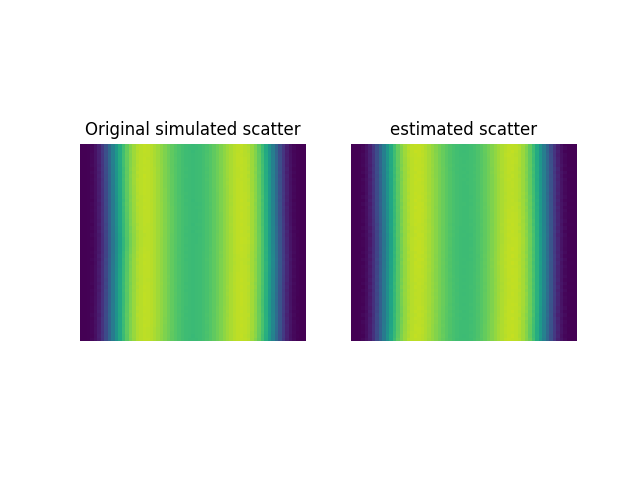

In [10]:
maxforplot=org_scatter_arr.max()*1.1;

plt.figure()
ax=plt.subplot(1,2,1);
plt.imshow(org_scatter_arr[0,10,:,:,]);
plt.clim(0,maxforplot)
ax.set_title('Original simulated scatter');
plt.axis('off');

ax=plt.subplot(1,2,2);
plt.imshow(estimated_scatter_arr[0,10,:,:,]);
plt.clim(0,maxforplot);
ax.set_title('estimated scatter');
plt.axis('off');

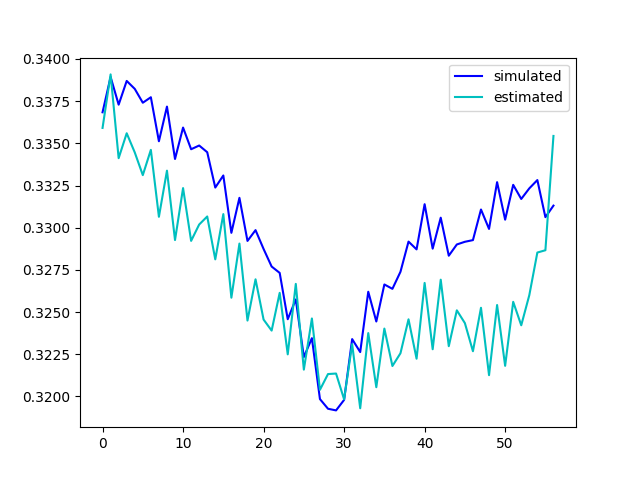

In [11]:
# central (over views)
plt.figure()
plt.plot(org_scatter_arr[0,10,:,24//2],'b', label='simulated')
plt.plot(estimated_scatter_arr[0,10,:,24//2],'c', label='estimated')
plt.legend();

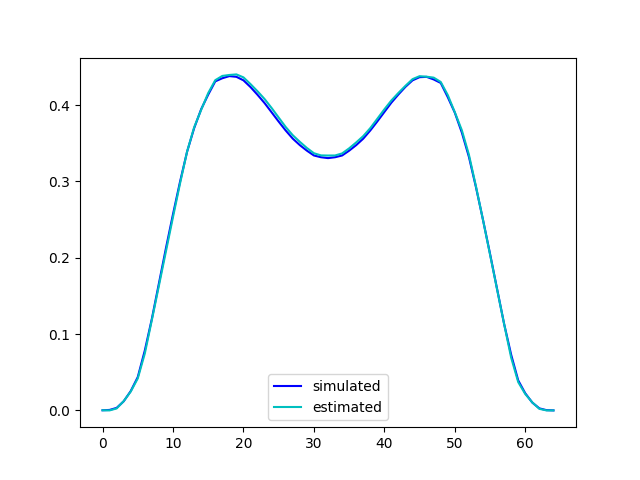

In [12]:
# horizontal (one view)
plt.figure()
plt.plot(org_scatter_arr[0,10,1,:],'b', label='simulated')
plt.plot(estimated_scatter_arr[0,10,1,:],'c', label='estimated')
plt.legend();

#Reconstruction

In [14]:
full_norm_projdata =  stir.ProjDataInMemory(acf_factors)
#print( help( full_norm_projdata ) )
#print( help( norm ) )

#norm.apply(full_norm_projdata)

#norm.apply(full_norm_projdata.get_related_viewgrams(stir.ViewSegmentNumbers(0, 0), stir.TrivialDataSymmetriesForViewSegmentNumbers()))
#norm.apply(full_norm_projdata.get_related_viewgrams(stir.ViewgramIndices(0, 0), stir.TrivialDataSymmetriesForViewSegmentNumbers))
#norm.apply(full_norm_projdata.get_related_viewgrams(stir.DataSymmetriesForViewSegmentNumbers.get_related_view_segment_numbers(), stir.DataSymmetriesForViewSegmentNumbers))

full_norm = stir.BinNormalisationFromProjData(full_norm_projdata)
full_norm.set_up(prompts.get_exam_info(), prompts.get_proj_data_info())

<stir::Succeeded::yes>

In [15]:
background = stir.ProjDataInMemory(randoms) + stir.ProjDataInMemory(estimated_scatter)
#background = stir.ProjDataInMemory(randoms)
#background += stir.ProjDataInMemory(estimated_scatter)

additive_term = stir.ProjDataInMemory(background)

full_norm.apply(additive_term)

TypeError: unsupported operand type(s) for +: 'stir.ProjDataInMemory' and 'stir.ProjDataInMemory'

In [ ]:
osem = stir.OSMAPOSLReconstruction3DFloat()
osem.set_num_subsets(8)
osem.set_num_subiterations(96)
osem.set_disable_output(True)
#osem.set_post_processor_sptr(filter)
objfunc = stir.PoissonLogLikelihoodWithLinearModelForMeanAndProjData3DFloat()
osem.set_objective_function(objfunc)
objfunc.set_input_data(prompts)
objfunc.set_normalisation_sptr(full_norm)
objfunc.set_additive_proj_data_sptr(additive_term)

In [ ]:
initial_image = stir.FloatVoxelsOnCartesianGrid(prompts.get_exam_info(), prompts.get_proj_data_info())
initial_image.fill(1)

In [ ]:
osem.set_up(initial_image)

In [ ]:
osem.reconstruct()

In [ ]:
osem_image = osem.get_target_image()

In [ ]:
org_image=to_numpy(stir.FloatVoxelsOnCartesianGrid.read_from_file('OSEM_recon_with_actual_scatter_96.hv'))
recon_image = stir.FloatVoxelsOnCartesianGrid.read_from_file('OSEM_recon_with_estimated_scatter_96_run0.hv')
result=to_numpy(recon_image)

In [ ]:
osem_image_arr = to_numpy(osem_image)

In [ ]:
org_additive_term = stir.ProjData.read_from_file('my_additive_sinogram_g1.hs')
objfunc.set_additive_proj_data_sptr(org_additive_term)
osem.set_start_subset_num(0)
osem.set_num_subiterations(96)
osem.reconstruct()
org_recon = osem.get_target_image()

In [ ]:
org_image_arr = to_numpy(org_recon)

Display of Images

In [ ]:
maxforplot=org_image_arr.max()*1.1;

slice=10;
plt.figure();
ax=plt.subplot(1,2,1);
plt.imshow(org_image_arr[slice,:,:,]);
plt.colorbar();
plt.clim(0,maxforplot);
ax.set_title('OSEM with correct scatter')
plt.axis('off');

ax=plt.subplot(1,2,2);
plt.imshow(osem_image_arr[slice,:,:,]);
plt.clim(0,maxforplot);
plt.colorbar();
ax.set_title('OSEM with scatter estimation')
plt.axis('off');

In [ ]:
plt.figure();
plt.plot(org_image_arr[10,154//2,:],'b');
plt.plot(osem_image_arr[10,154//2,:],'c');
plt.legend(('actual scatter','estimated scatter'));

Difference with measured data

In [ ]:
rt_matrix = stir.ProjMatrixByBinUsingRayTracing()
forward_projector = stir.ForwardProjectorByBinUsingProjMatrixByBin(rt_matrix)
forward_projection = stir.ProjDataInMemory(prompts)
forward_projector.set_up(forward_projection.get_proj_data_info(), osem_image)
#forward_projection.fill(0)

In [ ]:
forward_projector.forward_project(forward_projection, recon_image)

full_norm.undo(forward_projection)

In [ ]:
diff = to_numpy(stir.ProjDataInMemory(prompts) - stir.ProjDataInMemory(randoms) - forward_projection)

In [ ]:
maxforplot=org_scatter_arr.max()*1.1;

plt.figure()
ax=plt.subplot(1,3,1);
plt.imshow(org_scatter_arr[0,10,:,:,]);
plt.clim(0,maxforplot)
ax.set_title('Original simulated scatter');
plt.axis('off');

ax=plt.subplot(1,3,2);
plt.imshow(estimated_scatter_arr[0,10,:,:,]);
plt.clim(0,maxforplot);
ax.set_title('estimated scatter');
plt.axis('off');

ax=plt.subplot(1,3,3);
plt.imshow(diff[0,10,:,:,]);
plt.clim(0,maxforplot);
ax.set_title('remainder');
plt.axis('off');

In [ ]:
from scipy.ndimage import gaussian_filter

diff.shape
filtered = gaussian_filter(diff, (0,5,2,8))

In [ ]:
plt.figure()
plt.imshow(filtered[0,10,:,:])

In [ ]:
# horizontal (one view)
plt.figure()
plt.plot(org_scatter_arr[0,10,1,:],'b', label='simulated')
plt.plot(estimated_scatter_arr[0,10,1,:],'c', label='estimated')
plt.plot(filtered[0,10,1,:],'c', label='remainder after filtering')
plt.legend();